In [ ]:
# first we have to import the python liabaray for analytics purpose
#for linear algebra
import numpy as np
# for data processing session
import pandas as pd
#for data visualization 
import matplotlib.pyplot as plt
#now with the play button just checked lib are properly installed or not.
#no such error are find
#next we import seaborn lib
#seaborn is also data visualization library built on top of the matplotlib
import seaborn as sns 
#now we use matplotlib inline which is used for the output of plotting commands is displayed inline within frontends like jupitar notebook. 
#Mainly used for inline plotting
%matplotlib inline
#we will import other many libs as per our EDA requirements
#also check all libs are properly installed or not, click the play button
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

#for the millions format function
#The matplotlib. ticker. FuncFormatter class uses a user defined function for formatting
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as tkr
import matplotlib as mpl
from datetime import datetime, timedelta
from pandas import DataFrame
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import re

In [ ]:
# now we will import all our dataset in colab environment.
#it will take sometime.
#remaining data are loading in the session environment of colabs. its a session data.
#all dataset are imported inside the colab session.

In [ ]:
#create all user define formatter function
# for create thousand formatter option
def thousand_count_y(y, pos):
    return '{:.0f} k'.format(y*1e-3)
formatter_thousand_count_y = FuncFormatter(thousand_count_y)

In [ ]:
#same thing we have to count millions_count_formatter
def millions_count_y(y, pos):
    return '{:.0f} M'.format(y*1e-6)
formatter_millions_count_y = FuncFormatter(millions_count_y)

In [ ]:
#thounds count formater with x value
def thousand_count_x(x,pos):
    return '{:.0f} k'.format(x*1e-3)
formatter_thousand_count_x = FuncFormatter(thousand_count_x)

In [ ]:
#millions count formatter_x 
def millions_count_x(x, pos):
    return '{:.0f} M'.format(x*1e-6)
formatter_millions_count_x = FuncFormatter(millions_count_x)

In [ ]:
#thousand real y formatter function
def thousand_real_y(y,pos):
    return 'R${:.0f} k'.format(y*1e-3)
formatter_thousand_real_y = FuncFormatter(thousand_real_y)

In [ ]:
#millions real y formatter function
def millions_real_y(y, pos):
   return 'R${:.1f} M'.format(y*1e-6)
formatter_millions_real_y = FuncFormatter(millions_real_y)

In [ ]:
#thousands real x formatter function
def thousand_real_x(x,pos):
    return 'R${:.0f} k'.format(x*1e-3)
formatter_thousand_real_x = FuncFormatter(thousand_real_x)

In [ ]:
#millions real x formatter function
def millions_real_x(x,pos):
   return 'R${:.1f} M'.format(x*1e-6)
formatter_millions_real_x = FuncFormatter(millions_real_x)

In [ ]:
#all csv files are imported over here
customer_data = pd.read_csv("olist_customers_dataset.csv")
sellers_data = pd.read_csv("olist_sellers_dataset.csv")
order_reviews_data = pd.read_csv("olist_order_reviews_dataset.csv")
order_items_data = pd.read_csv("olist_order_items_dataset.csv")
products_data = pd.read_csv("olist_products_dataset.csv")
geolocation_data = pd.read_csv("olist_geolocation_dataset.csv")
product_category_data = pd.read_csv("product_category_name_translation.csv")
orders_data = pd.read_csv("olist_orders_dataset.csv")
order_payments_data = pd.read_csv("olist_order_payments_dataset.csv")


**Merge Multiple Csv files into one csv file**

In [ ]:
# merging two csv files
df = pd.concat(
    map(pd.read_csv, [
                      'olist_customers_dataset.csv',
                      'olist_orders_dataset.csv', 
                      'olist_sellers_dataset.csv',
                      'olist_order_reviews_dataset.csv',
                      'olist_order_items_dataset.csv',
                      'olist_products_dataset.csv',
                      'olist_geolocation_dataset.csv',
                      'product_category_name_translation.csv',
                      'olist_order_payments_dataset.csv'
                      ]
        ), ignore_index=True)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#information of the customer_data dataframe
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
 #DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
customer_data.shape

(99441, 5)

In [ ]:
#now import the csv file with pandas read csv file.

#first five rows of the dataset
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#last five rows of the dataset
customer_data.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [ ]:
 #computes and displays summary statistics for a customer_data dataframe
customer_data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
#check any null values are present or not
customer_data.isnull().values.any()
#it returns false

False

In [ ]:
#check any missing values are present or not
customer_data.isna().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

In [ ]:
#check missing values sum
customer_data.isnull().sum()
#it returns 0

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
#print how many columns are there inside the csv list
print(customer_data.columns.to_list())

['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [ ]:
##information of the seller_data_information
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
sellers_data.shape

(3095, 4)

In [ ]:
#now import sellers data
print(sellers_data.columns.to_list())

['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


In [ ]:
#first five rows from the dataset
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
#last 5 rows from the dataset
sellers_data.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [ ]:
#computes and displays summary statistics for a sellers_data dataframe
sellers_data.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
#check any null values are present or not inside sellers data
sellers_data.isnull().values.any()

False

In [ ]:
#check any missing values are present or not inside the data from of Sellers_data
sellers_data.isna().any()

seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool

In [ ]:
#check missing values sum
sellers_data.isnull().sum()
#it returns 0

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
#information of the order_reviews_data dataframe
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
order_reviews_data.shape

(99224, 7)

In [ ]:
#first five rows of the dataset
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
#last five rows of the dataset
order_reviews_data.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [ ]:
#computes and displays summary statistics for a order_review_data dataframe
order_reviews_data.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
#check any null values are present or not
order_reviews_data.isnull().values.any()

True

In [ ]:
#check any missing values are present or not
order_reviews_data.isna().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

In [ ]:
#how many columns are present inside the data
print(order_reviews_data.columns.to_list())

['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [ ]:
#sum how many null values are present inside the dataset
order_reviews_data.isnull().sum()
#in review_comment_title & review_comment_message NAN values are present

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
#if found missing values in categorical dataset we have to use dropna function & changes inside the dataset with 
#inplace=true
order_reviews_data.dropna(axis=0, inplace =True)

In [ ]:
#check missing values are changes from dataset or not
#check first five rows
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02


In [ ]:
#check missing values are changes from dataset or not
#check last five rows
order_reviews_data.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99187,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\r\n\r\nExcelente atendimento,b...",2018-05-22 00:00:00,2018-05-23 00:51:43
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,2018-06-06 10:52:19
99200,2ee221b28e5b6fceffac59487ed39348,f2d12dd37eaef72ed7b1186b2edefbcd,2,Foto enganosa,Foto muito diferente principalmente a graninha...,2018-03-28 00:00:00,2018-05-25 01:23:26


In [ ]:
#information of the order_items_data dataframe
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
order_items_data.shape

(112650, 7)

In [ ]:
#read first five rows from the dataset
order_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#read last five rows from the dataset
order_items_data.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [ ]:
#computes and displays summary statistics for a order_review_data dataframe
order_items_data.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
#check any null values are present or not
order_items_data.isnull().values.any()

False

In [ ]:
#check any missing values are present or not
order_items_data.isna().any()

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

In [ ]:
#sum how many null values are present inside the dataset
order_items_data.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
#information of the products_data dataframe
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
products_data.shape

(32951, 9)

In [ ]:
#check first five rows from the dataset
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#check last five rows from the dataset
products_data.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [ ]:
#computes and displays summary statistics for a products_data dataframe
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
#check any null values are present or not
products_data.isnull().values.any()

True

In [ ]:
#sum how many null values are present inside the dataset
products_data.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
#check any missing values are present or not
products_data.isna().any()

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [ ]:
#returns the number of missing values in each column.
products_data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
#if found missing values in categorical dataset we have to use dropna function & changes inside the dataset with 
#inplace=true
#We can drop a row or column with missing values using dropna() function. how parameter is used to set condition to drop.
products_data.dropna(axis=0, how="any", inplace =True)

In [ ]:
#now check any missing values are present or not
products_data.isna().any()
#it returns false

product_id                    False
product_category_name         False
product_name_lenght           False
product_description_lenght    False
product_photos_qty            False
product_weight_g              False
product_length_cm             False
product_height_cm             False
product_width_cm              False
dtype: bool

In [ ]:
#returns the number of missing values in each column.
products_data.isna().sum()
#it returns 0

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
#show all the columns in list format
print(products_data.columns.to_list())

['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [ ]:
#information of the geolocation_data dataframe
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529514 entries, 0 to 529513
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  529514 non-null  int64  
 1   geolocation_lat              529514 non-null  float64
 2   geolocation_lng              529514 non-null  float64
 3   geolocation_city             529513 non-null  object 
 4   geolocation_state            529513 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.2+ MB


In [ ]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
geolocation_data.shape

(529514, 5)

In [ ]:
#check first five rows from the dataset
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
#check last five rows from the dataset
geolocation_data.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
529509,29185,-19.938533,-40.402695,fundao,ES
529510,29153,-20.305571,-40.369476,cariacica,ES
529511,29129,-20.519215,-40.360035,vila velha,ES
529512,29166,-20.224250,-40.282293,serra,ES
529513,29171,-20.134916,-40.240000,NaN,NaN


In [ ]:
#show all the columns in list format
print(geolocation_data.columns.to_list())

['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


In [ ]:
#check the null values from the dataset
geolocation_data.isnull().values.any()

True

In [ ]:
#check any missing values are present or not inside the dataset
geolocation_data.isna().any()

geolocation_zip_code_prefix    False
geolocation_lat                False
geolocation_lng                False
geolocation_city                True
geolocation_state               True
dtype: bool

In [ ]:
#computes and displays summary statistics for a order_review_data dataframe
geolocation_data.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,529514.000000,529514.000000,529514.000000
mean,12628.701568,-23.039012,-46.132899
std,7937.666795,0.836427,2.016606
min,1001.000000,-34.586422,-63.907933
25%,5523.000000,-23.573794,-46.837721
50%,11760.000000,-23.440762,-46.613122
75%,19010.000000,-22.812556,-45.455957
max,29199.000000,43.684961,13.820214


In [ ]:
#information of the product_category_data dataframe
product_category_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
product_category_data.shape

(71, 2)

In [ ]:
#first five rows from the dataset
product_category_data.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
#last five rows from the dataset
product_category_data.tail()

,product_category_name,product_category_name_english
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


In [ ]:
#computes and displays summary statistics for a order_review_data dataframe
product_category_data.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,fashion_male_clothing
freq,1,1


In [ ]:
#how many columns are present inside the dataset
print(product_category_data.columns.to_list())

['product_category_name', 'product_category_name_english']


In [ ]:
#how many missing values are present or not
product_category_data.isna().any()
#it returns false

product_category_name            False
product_category_name_english    False
dtype: bool

In [ ]:
#check any null values are present or not
product_category_data.isnull().values.any()
#it returns also false

False

In [ ]:
#information of the orders_data dataframe
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
orders_data.shape

(99441, 8)

In [ ]:
#showing first five rows from the dataset
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#showing last five rows from the dataset
orders_data.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [ ]:
#how many columns are present inside the dataset
print(orders_data.columns.to_list())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [ ]:
#computes and displays summary statistics for a orders_data dataframe
orders_data.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,8b2ceb139bb51537042aac7481130f5f,656c94f2310f24aeb13ecc4ef2941e3d,delivered,2018-07-28 13:11:22,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
#how many missing values are present or not
orders_data.isna().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

In [ ]:
#if found missing values in categorical dataset we have to use dropna function & changes inside the dataset with 
#inplace=true
#We can drop a row or column with missing values using dropna() function. how parameter is used to set condition to drop.
orders_data.dropna(axis=0, how="any", inplace =True)

In [ ]:
#how many missing values are present or not
orders_data.isna().any()
#it returns false

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                False
order_delivered_carrier_date     False
order_delivered_customer_date    False
order_estimated_delivery_date    False
dtype: bool

In [ ]:
#information of the order_payments_data dataframe
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
#DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
order_payments_data.shape

(103886, 5)

In [ ]:
#first five rows from the dataset
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
#last five rows from the dataset
order_payments_data.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [ ]:
#print all the columns from the dataset
print(order_payments_data.columns.to_list())

['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


In [ ]:
#computes and displays summary statistics for a order_review_data dataframe
order_payments_data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
#how many missing values are present or not
order_payments_data.isna().any()
#it returns false

order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool

In [ ]:
#column wise missing value checking
order_payments_data.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#change the datatype for data columns in dataframe order 
get_time_stamp_columns = [
                "order_purchase_timestamp",
                "order_approved_at",
                "order_delivered_carrier_date",
                "order_estimated_delivery_date"
]
print(get_time_stamp_columns)

['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']


In [ ]:
#make one for loop of the timestamp columns
for column in get_time_stamp_columns:
     orders_data[column] = pd.to_datetime(orders_data[column])


In [ ]:
#extracting attributes from purchase date year & month wise
orders_data.head()
print(orders_data.columns.to_list())
#we need this columns for extracting value from order purchase date

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [ ]:
#get the purchase year
orders_data["order_purchase_year"] = orders_data["order_purchase_timestamp"].apply(lambda x:x.year)
#get the order purchase month
orders_data["order_purchase_month"] = orders_data["order_purchase_timestamp"].apply(lambda x: x.month)
#get the order purchase month name
orders_data["order_purchase_month_name"] = orders_data["order_purchase_timestamp"].apply(lambda x: x.strftime('%b'))
#get the order purchase year month
orders_data["order_purchase_year_month"] = orders_data["order_purchase_timestamp"].apply(lambda x: x.strftime('%Y%m'))
#get the order purchase date
orders_data["order_purchase_date"] = orders_data["order_purchase_timestamp"].apply(lambda x: x.strftime('%Y%m%d'))


In [ ]:
#print the order purchase year
print(orders_data["order_purchase_year"])
#print the order purchase month
print(orders_data["order_purchase_month"])
#print the order purchase month name
print(orders_data["order_purchase_month_name"])
#print the order purchase year month
print(orders_data["order_purchase_year_month"])
#print the order purchase date
print(orders_data["order_purchase_date"])

0        2017
1        2018
2        2018
3        2017
4        2018
         ... 
99436    2017
99437    2018
99438    2017
99439    2018
99440    2018
Name: order_purchase_year, Length: 96461, dtype: int64
0        10
1         7
2         8
3        11
4         2
         ..
99436     3
99437     2
99438     8
99439     1
99440     3
Name: order_purchase_month, Length: 96461, dtype: int64
0        Oct
1        Jul
2        Aug
3        Nov
4        Feb
        ... 
99436    Mar
99437    Feb
99438    Aug
99439    Jan
99440    Mar
Name: order_purchase_month_name, Length: 96461, dtype: object
0        201710
1        201807
2        201808
3        201711
4        201802
          ...  
99436    201703
99437    201802
99438    201708
99439    201801
99440    201803
Name: order_purchase_year_month, Length: 96461, dtype: object
0        20171002
1        20180724
2        20180808
3        20171118
4        20180213
           ...   
99436    20170309
99437    20180206
99438    2017082

In [ ]:
#extracting attributes for purchase date - Day & Day of week as per same format
orders_data["order_purchase_day"] = orders_data["order_purchase_timestamp"].apply(lambda x: x.day)
#print the first five row of data
print(orders_data["order_purchase_day"].head())
# we can specify how many row we want to get that also possible
print(orders_data["order_purchase_day"].head(3))

0     2
1    24
2     8
3    18
4    13
Name: order_purchase_day, dtype: int64
0     2
1    24
2     8
Name: order_purchase_day, dtype: int64


In [ ]:
#get the day of week value
orders_data["order_purchase_day"] = orders_data["order_purchase_timestamp"].apply(lambda x:x.dayofweek)
#print the first 3 records 
print(orders_data["order_purchase_day"].head(3))

0    0
1    1
2    2
Name: order_purchase_day, dtype: int64


In [ ]:
#get the day of week name
orders_data["order_purchase_day"] = orders_data["order_purchase_timestamp"].apply(lambda x:x.strftime('%a'))
print(orders_data["order_purchase_day"].head(3))

0    Mon
1    Tue
2    Wed
Name: order_purchase_day, dtype: object


In [ ]:
#extracting the attributes for purchase date - Hour and Time of the Day
orders_data["order_purchase_hour"] = orders_data["order_purchase_timestamp"].apply(lambda x:x.hour)
#print the first 3 records
print(orders_data["order_purchase_hour"].head(3))

0    10
1    20
2     8
Name: order_purchase_hour, dtype: int64


In [ ]:
hours_bin = [-0.1,6,12,18,23]
hours_label =["Dawn","Morning","Afternoon","Night"]
#pd.cut() is used to seperate the array elements into different bins
orders_data["order_purchase_time_day"] = pd.cut(orders_data["order_purchase_hour"],hours_bin,labels=hours_label)
#print the first three records 
print(orders_data["order_purchase_time_day"].head(3))

0    Morning
1      Night
2    Morning
Name: order_purchase_time_day, dtype: category
Categories (4, object): ['Dawn' < 'Morning' < 'Afternoon' < 'Night']


In [ ]:
#if i want to delete 2016 records & update the current data object or csv
orders_data.drop(orders_data.loc[orders_data["order_purchase_year"] == 2016].index,inplace = True)
orders_data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,20180724,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,20180808,Wed,8,Morning


In [ ]:
#load all csv files one by one
customers_data = pd.read_csv("olist_customers_dataset.csv")
#get the dataframe info from customers_data
customers_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
#using shape -> dataframe stores the number of rows & columns as tuple(number of rows & number of columns)
customers_data.shape

(99441, 5)

In [ ]:
#to know the datatype 
customers_data.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
#to get the first 3 records of the dataset
customers_data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [ ]:
#to get the last 3 records of the dataset
customers_data.tail(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [ ]:
#compute & display summary statistics of the customer data set
customers_data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
#to check the missing values from the customer data set
customers_data.isna().any()
#it returns false

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

In [ ]:
#to check sum of the missing values
customers_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
#to check the null values from the dataset
customers_data.isnull().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

In [ ]:
#to check sum of the null values from the dataset
customers_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
#remove the duplicate items from the dataset if exists
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers_data = customers_data.drop_duplicates(subset=["customer_unique_id"])
#now city name should be starting with Capital Letter
customers_data["customer_city"]= customers_data["customer_city"].str.capitalize()
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [ ]:
#The 5 cities with the most clients
clients_by_city = customers_data.groupby("customer_city").count()["customer_unique_id"]
clients_by_city = clients_by_city.reset_index()
clients_by_city = clients_by_city.sort_values(by = "customer_unique_id",ascending=False).head(5)
#inplace true means it will be updated inside the dataframe
clients_by_city.rename(columns = {"customer_unique_id":"total"},inplace=True)
clients_by_city

,customer_city,total
3596,Sao paulo,14971
3154,Rio de janeiro,6611
453,Belo horizonte,2671
558,Brasilia,2066
1143,Curitiba,1462


In [ ]:
#The top 5 states with the most clients
clients_by_state = customers_data.groupby("customer_state").count()["customer_unique_id"]
clients_by_state = clients_by_state.reset_index()
clients_by_state = clients_by_state.sort_values("customer_unique_id",ascending=False).head(5)
clients_by_state.rename(columns = {"customer_unique_id":"total"},inplace=True)
clients_by_state

,customer_state,total
25,SP,40295
18,RJ,12377
10,MG,11255
22,RS,5277
17,PR,4882


In [ ]:
#Merge Two elements of the data frame (Customer,Purchase date) to know the trend
#of how many customers made their first purchase(Merge two dataset)
#orders_data = pd.read_csv("olist_orders_dataset.csv")
#customerid should present in both dataset like sql inner join format
client_x_date = pd.merge (customers_data, orders_data, on ="customer_id")
client_x_date.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [ ]:
#now work on seller dataset
#import the seller data
sellers_data = pd.read_csv("olist_sellers_dataset.csv")

In [ ]:
#display the first five records of the seller data
#by default it takes 5 records
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
#Display the last five records of the seller data set
sellers_data.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [ ]:
#Information of the seller data dataframe
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
#how many rows & columns are present that we have to check
sellers_data.shape

(3095, 4)

In [ ]:
#check the data type of the seller data object
sellers_data.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [ ]:
#check is there any missing value are present or not
sellers_data.isna().any()
#it returns false

seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool

In [ ]:
#check sum of the missing values
sellers_data.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
#check any null values are present or not
sellers_data.isnull().values.any()
#it also returns false

False

In [ ]:
#check sum of the null values
sellers_data.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
#check the seller city first letter
sellers_data.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
#Seller city's first letter should be capitalized
sellers_data["seller_city"] = sellers_data["seller_city"].str.capitalize()
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca paulista,SP


In [ ]:
#find out the top 5 cities with most sellers
sellers_by_city = sellers_data.groupby("seller_city").count()["seller_id"]
sellers_by_city = sellers_by_city.reset_index()
sellers_by_city = sellers_by_city.sort_values(by ="seller_id", ascending=False).head(5)
sellers_by_city.rename(columns ={"seller_id":"total"}, inplace =True)
sellers_by_city.head()

,seller_city,total
517,Sao paulo,694
159,Curitiba,127
450,Rio de janeiro,96
64,Belo horizonte,68
442,Ribeirao preto,52


In [ ]:
#find out the top 5 states with the most sellers
sellers_by_state = sellers_data.groupby("seller_state").count()["seller_id"]
sellers_by_state = sellers_by_state.reset_index()
sellers_by_state = sellers_by_state.sort_values(by ="seller_id", ascending=False).head(5)
#the data will be updated inside the dataframe if Inplace =True
sellers_by_state.rename(columns ={"seller_id":"total"},inplace =True)
sellers_by_state.head()

,seller_state,total
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171


In [ ]:
#merge elements of the data frame (Customer,purchase date) to
#know the trend of how many customers made their first purchase
order_items_data.head()
#order_id should be present in both data set like sql inner join format
sellers_x_date = pd.merge(order_items_data, orders_data, on ="order_id")
sellers_x_date = sellers_x_date.drop_duplicates(subset=["seller_id"])
sellers_x_date.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


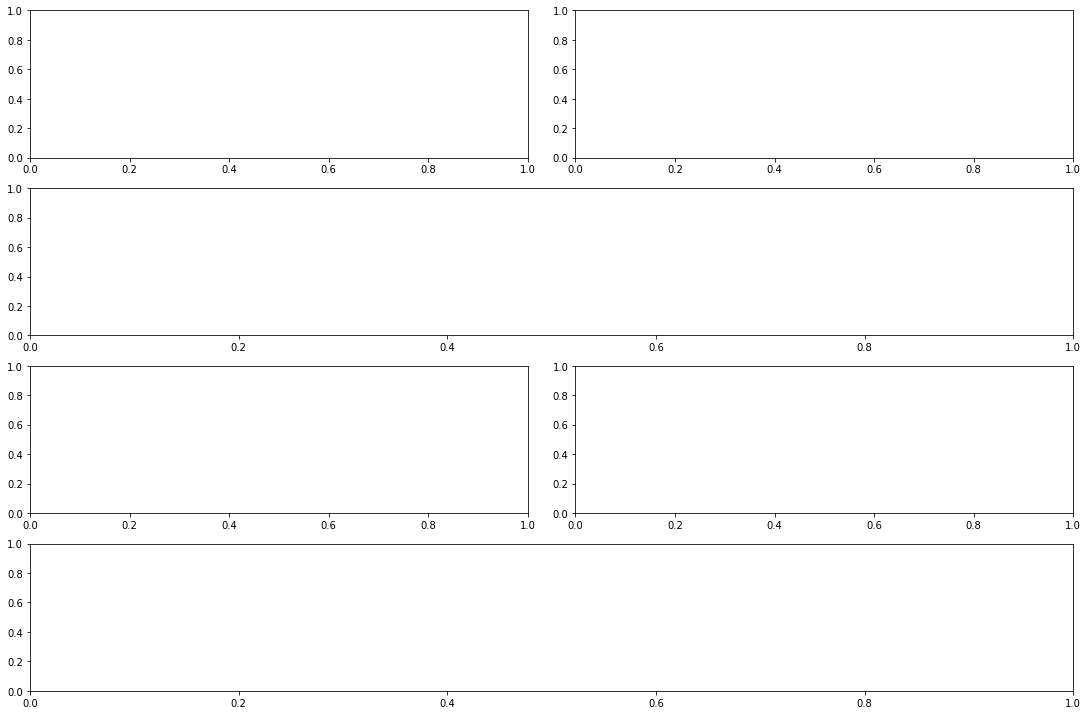

In [ ]:
#now we are going to create some graphs
#using plt figuare option in python
#it is used to create a figuare object. The whole Figuare is regarded
#as the figuare object. It is necessary to explicitly use plt.figuare() when we want to
#tweak the size of the figuare & when we want to add multiple axes objects in a single figuare.
#constrained layout attempts to resize subplots in a figuare so that there are no
#overlaps between axes objects & labels on the axes
fig = plt.figure(constrained_layout=True, figsize=(15,12))
gs = GridSpec(5, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
#ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
#ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[3, :])
#subplot quardient is ready
#now we have to put our inference in next video.

In [ ]:
#Customer city
#create bar plot & fit the clients by city data
sns.barplot(x="total", y="customer_city", data=clients_by_city, ax=ax1, palette='viridis')
ax1.set_title("The 10 cities with the most clients", size=14, color='black')
ax1.set_xlabel("")
ax1.set_ylabel("")
for rect in ax1.patches:
    ax1.annotate('{:,.0f}'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='left', size=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)


In [ ]:
#Customer states
sns.barplot(x="total", y='customer_state', data=clients_by_state, ax=ax2, palette="YlGnBu")
ax2.set_title("The 10 states with the most clients", size=14, color='black')
ax2.set_xlabel("")
ax2.set_ylabel("")
for rect in ax2.patches:
    ax2.annotate('{:,.0f}'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='left', size=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)

In [ ]:
client_x_date.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00


In [ ]:
# Change data type for date columns in dataframe orders
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    orders_data[col] = pd.to_datetime(orders_data[col])

# Extracting attributes for purchase date - Year and Month
orders_data['order_purchase_year'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.year)
orders_data['order_purchase_month'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.month)
orders_data['order_purchase_month_name'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders_data['order_purchase_year_month'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders_data['order_purchase_date'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
orders_data['order_purchase_day'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.day)
orders_data['order_purchase_dayofweek'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders_data['order_purchase_dayofweek_name'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
orders_data['order_purchase_hour'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders_data['order_purchase_time_day'] = pd.cut(orders_data['order_purchase_hour'], hours_bins, labels=hours_labels)

# Delete 2016 data
orders_data.drop(orders_data.loc[orders_data["order_purchase_year"]==2016].index, inplace=True)

In [ ]:
clients_x_date = pd.merge(customer_data, orders_data, on = "customer_id")
clients_x_date.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017,5,May,201705,20170516,16,1,Tue,15,Afternoon
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018,1,Jan,201801,20180112,12,4,Fri,20,Night
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018,5,May,201805,20180519,19,5,Sat,16,Afternoon
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018,3,Mar,201803,20180313,13,1,Tue,16,Afternoon
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018,7,Jul,201807,20180729,29,6,Sun,9,Morning


In [ ]:
clients_x_date.columns.to_list()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_purchase_year',
 'order_purchase_month',
 'order_purchase_month_name',
 'order_purchase_year_month',
 'order_purchase_date',
 'order_purchase_day',
 'order_purchase_dayofweek',
 'order_purchase_dayofweek_name',
 'order_purchase_hour',
 'order_purchase_time_day']

In [ ]:
#Customer per year
sns.lineplot(x="order_purchase_year_month", y="order_id", data=clients_x_date.groupby("order_purchase_year_month").agg({"order_id" : "count"}).reset_index(),ax=ax3, alpha=0.8,
             color='darkslateblue', linewidth=1, marker='o', markersize=4)
sns.barplot(x="order_purchase_year_month", y="order_id", data=clients_x_date.groupby("order_purchase_year_month").agg({"order_id" : "count"}).reset_index(),ax=ax3, alpha=0.1)
ax3.set_title("Customer Evolution", size=14, color="black")
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_ylim(0,9000)
#plt.setp(ax3.get_xticklabels(), rotation=45)
for p in ax3.patches:
        ax3.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="top", xytext=(0, 15), textcoords="offset points", 
                    color= "black", size=12)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.set_yticklabels([])
ax3.set_yticks([])

[]

In [ ]:
#Total de Customers
ax3.text(-1.5, 8000, "93,447", fontsize=22, ha='center', color="navy")
ax3.text(-1.5, 7200, "Total Customers", fontsize=10, ha='center')
ax3.text(-1.5, 5000, "41,067", fontsize=18, ha='center', color="navy")
ax3.text(-1.5, 4200, "Customers 2017", fontsize=8, ha='center')
ax3.text(-1.5, 2000, "52,410", fontsize=18, ha='center', color="navy")
ax3.text(-1.5, 1200, "Customers 2018", fontsize=8, ha='center')

Text(-1.5, 1200, 'Customers 2018')

In [ ]:
#next video we will calculate the sellers per year data
# Sellers city
sns.barplot(x="total", y="seller_city", data=sellers_by_city, ax=ax5, palette='viridis')
ax5.set_title("The 10 cities with the most sellers", size=14, color='black')
ax5.set_xlabel("")
ax5.set_ylabel("")
for rect in ax5.patches:
    ax5.annotate('{:,.0f}'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='left', size=12)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.axes.get_xaxis().set_visible(False)

In [ ]:
# Sellers states
sns.barplot(x="total", y="seller_state", data=sellers_by_state, ax=ax6, palette="YlGnBu")
ax6.set_title("The 10 states with the most sellers", size=14, color='black')
ax6.set_xlabel("")
ax6.set_ylabel("")
for rect in ax6.patches:
    ax6.annotate('{:,.0f}'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='left', size=12)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.axes.get_xaxis().set_visible(False)

In [ ]:
# merge elements of the data frame (customer, purchase date) to know the trend of how many customers made their first purchase
sellers_x_date = pd.merge(order_items_data,orders_data, on = "order_id")
sellers_x_date = sellers_x_date.drop_duplicates(subset=["seller_id"])
sellers_x_date.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017,9,Sep,201709,20170913,13,2,Wed,8,Morning
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017,4,Apr,201704,20170426,26,2,Wed,10,Morning
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018,1,Jan,201801,20180114,14,6,Sun,14,Afternoon
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018,8,Aug,201808,20180808,8,2,Wed,10,Morning
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017,2,Feb,201702,20170204,4,5,Sat,13,Afternoon


In [ ]:
#Sellers per year
sns.lineplot(x="order_purchase_year_month", y="order_id", data=sellers_x_date.groupby("order_purchase_year_month").agg({"order_id" : "count"}).reset_index(),ax=ax8,
             color='darkslateblue', linewidth=1, marker='o', markersize=5)
sns.barplot(x="order_purchase_year_month", y="order_id", data=sellers_x_date.groupby("order_purchase_year_month").agg({"order_id" : "count"}).reset_index(),ax=ax8, alpha=0.1)
ax8.set_title("Seller Evolution", size=14, color="black")
ax8.set_xlabel("")
ax8.set_ylabel("")
ax8.set_ylim(0, 500)
plt.setp(ax8.get_xticklabels(), rotation=45)
for p in ax8.patches:
        ax8.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="top", xytext=(0, 15), textcoords="offset points", 
                    color= "black", size=12)
ax8.spines["top"].set_visible(False)
ax8.spines["right"].set_visible(False)
ax8.spines["left"].set_visible(False)
ax8.set_yticklabels([])
ax8.set_yticks([])

[]

In [ ]:
#next we calculate total sellers
#Total de Sellers
ax8.text(-1.5, 460, "3068", fontsize=22, ha='center', color="navy")
ax8.text(-1.5, 420, "Total Sellers", fontsize=10, ha='center')
ax8.text(-1.5, 300, "1,236", fontsize=18, ha='center', color="navy")
ax8.text(-1.5, 260, "Sellers 2017", fontsize=8, ha='center')
ax8.text(-1.5, 140, "1,832", fontsize=18, ha='center', color="navy")
ax8.text(-1.5, 100, "Sellers 2018", fontsize=8, ha='center')

Text(-1.5, 100, 'Sellers 2018')

In [ ]:
plt.suptitle("Customers and Sellers (2017-2018)", size=18)
#The tight_layout() function in pyplot module of matplotlib library is used to 
#automatically adjust subplot parameters to give specified padding.
#plt.tight_layout()

Text(0.5, 0.98, 'Customers and Sellers (2017-2018)')

<Figure size 432x288 with 0 Axes>

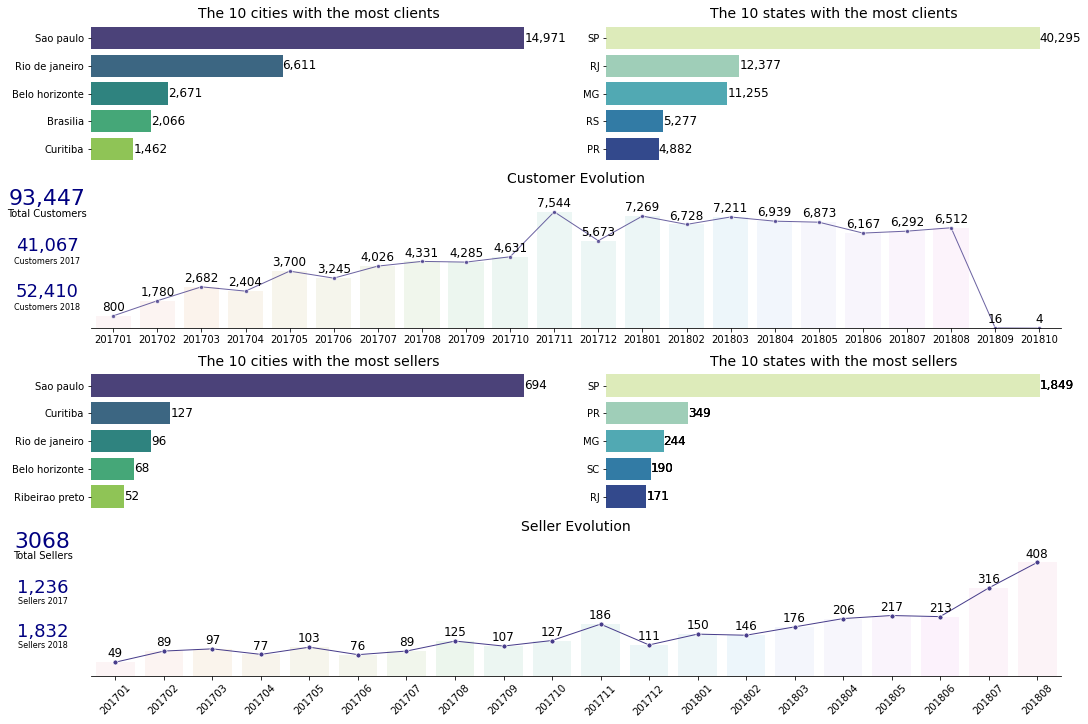

In [ ]:
#now we have to plot our graph with python
#just called fig which is mentioned earlier when we have configuared our matplotlib fig
fig

In [ ]:
#initalized figuare
fig = plt.figure(constrained_layout=True, figsize=(15, 8))

<Figure size 1080x576 with 0 Axes>

In [ ]:
# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

In [ ]:
# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(x="order_purchase_year_month", y="order_id", data=orders_data.groupby("order_purchase_year_month").agg({"order_id" : "count"}).reset_index(), ax=ax1, legend=False,
              marker='o',markersize=8)
sns.barplot(x="order_purchase_year_month", y="order_id", data=orders_data.groupby("order_purchase_year_month").agg({"order_id" : "count"}).reset_index(), ax=ax1, alpha=0.1)
#plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_title("Order item in Brazilian e-commerce", size=14, color='black')
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylim(0,8500)
for p in ax1.patches:
        ax1.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                    color= 'black', size=12)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_yticklabels([])
ax1.set_yticks([])

[]

In [ ]:
#Total Orders
ax1.text(-1, 7600, "96,708", fontsize=22, ha='center', color="navy")
ax1.text(-1, 7200, "Total Customers", fontsize=10, ha='center')
ax1.text(-1, 6000, "42,697", fontsize=18, ha='center', color="navy")
ax1.text(-1, 5600, "Customers 2017", fontsize=8, ha='center')
ax1.text(-1, 4400, "54,011", fontsize=18, ha='center', color="navy")
ax1.text(-1, 4000, "Customers 2018", fontsize=8, ha='center')

Text(-1, 4000, 'Customers 2018')

In [ ]:
# Barchart - Total of orders by day of week
day_order= ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sns.countplot(x="order_purchase_dayofweek_name", data=orders_data, order=day_order, ax=ax2, palette="GnBu_r")
ax2.set_title("Orders by Day of Week", size=14, color='black')
ax2.set_xlabel("")
ax2.set_ylabel("")
for p in ax2.patches:
        ax2.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= "black")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.set_major_formatter(formatter_thousand_count_y)

In [ ]:
# Barchart - Total of orders by time of the day
sns.countplot(x="order_purchase_time_day", data=orders_data,ax=ax3, palette="GnBu")
ax3.set_title("Orders by Time of the Day", size=14, color='black')
ax3.set_xlabel("")
ax3.set_ylabel("")
for p in ax3.patches:
        ax3.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                     ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= "black")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.yaxis.set_major_formatter(formatter_thousand_count_y)

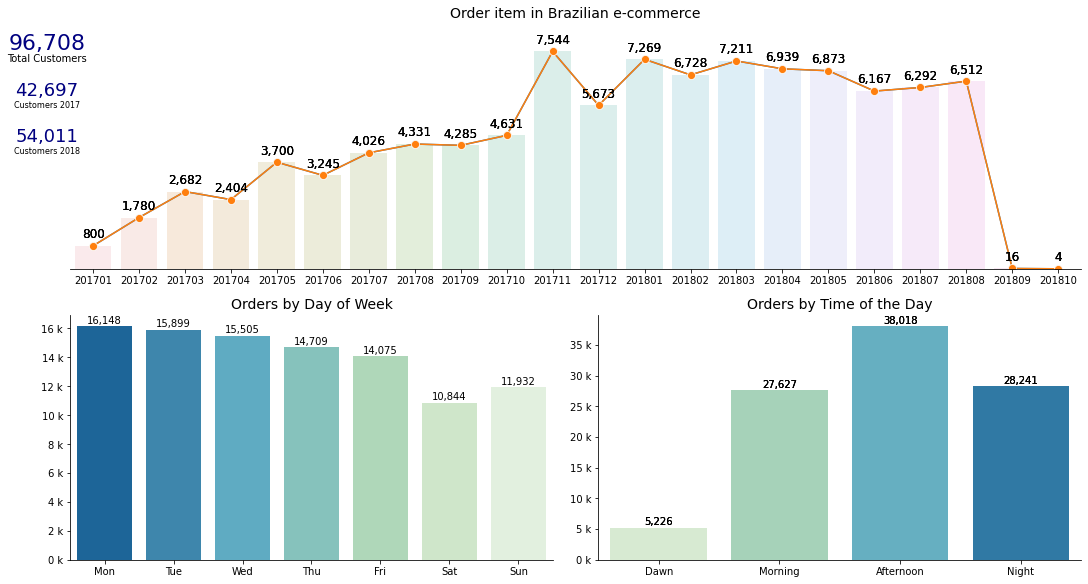

In [ ]:
#plt.tight_layout()
fig

In [ ]:
#We group order_id of items.csv to get the total cost of the order. (this because the purchase breakdown comes)
price = order_items_data.groupby("order_id").agg({ 'price': 'sum', 'freight_value': 'sum'}).reset_index()
price["total"] = price["price"] + price["freight_value"]
price.head(3)

,order_id,price,freight_value,total
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.9,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.0,17.87,216.87


In [ ]:
#We join price & order dataframe.
sales = pd.merge(price, orders_data, on="order_id")
sales.head()
#to check its columns
print(sales.columns.to_list())

['order_id', 'price', 'freight_value', 'total', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_year', 'order_purchase_month', 'order_purchase_month_name', 'order_purchase_year_month', 'order_purchase_date', 'order_purchase_day', 'order_purchase_dayofweek', 'order_purchase_dayofweek_name', 'order_purchase_hour', 'order_purchase_time_day']


In [ ]:
#Month & Year wise Sales Data
sales_year_month = sales.groupby(by=["order_purchase_year", "order_purchase_year_month","order_purchase_month_name"]).agg({"order_id": "count","price": "sum","freight_value": "sum","total": "sum"}).reset_index()
sales_year_month.head(2)

,order_purchase_year,order_purchase_year_month,order_purchase_month_name,order_id,price,freight_value,total
0,2017,201701,Jan,789,120312.87,16875.62,137188.49
1,2017,201702,Feb,1733,247303.02,38977.60,286280.62


In [ ]:
#to check its columns
print(sales_year_month.columns.to_list())

['order_purchase_year', 'order_purchase_year_month', 'order_purchase_month_name', 'order_id', 'price', 'freight_value', 'total']


In [ ]:
#to get the sales year value
sales_year = sales.groupby(by=["order_purchase_year"]).agg({"total": "sum"}).reset_index()
sales_year

,order_purchase_year,total
0,2017,7142672.43
1,2018,8643697.60


In [ ]:
#create the figuare of matplotlib data plotting
fig = plt.figure(constrained_layout=True, figsize=(15, 10))

<Figure size 1080x720 with 0 Axes>

In [ ]:
# Axis definition
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2,:])

In [ ]:
#create Month order array list
month_order= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
print(month_order)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [ ]:
#Yearly sales data plotting
sns.barplot(x="order_purchase_month_name", y="price", data=sales_year_month.loc[sales_year_month["order_purchase_year"]==2017], order=month_order, ax=ax1, color="skyblue", label="Price")
sns.barplot(x="order_purchase_month_name", y="freight_value", data=sales_year_month.loc[sales_year_month["order_purchase_year"]==2017], order=month_order, ax=ax1, color="yellow", label="Freight")
ax1.set_title("Order value and shipping cost 2017", size=16)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.legend(loc="upper right")
for p in ax1.patches:
        ax1.annotate('R${:,.0f}'.format(p.get_height()+5.9), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='top',
                    color= 'black')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.set_major_formatter(formatter_millions_real_y)

ax1.text(1, 900000, f'R$7,142,672', fontsize=20, color='mediumseagreen', ha='center')
ax1.text(1, 820000, 'Amount sold', fontsize=10, ha='center')


Text(1, 820000, 'Amount sold')

In [ ]:
sns.barplot(x="order_purchase_month_name", y="price", data=sales_year_month.loc[sales_year_month["order_purchase_year"]==2018], order=month_order, ax=ax2, color="skyblue", label="Price")
sns.barplot(x="order_purchase_month_name", y="freight_value", data=sales_year_month.loc[sales_year_month["order_purchase_year"]==2018], order=month_order, ax=ax2, color="yellow", label="Freight")
ax2.set_title("Order value and shipping cost 2018", size=16)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.legend(loc="upper right")
for p in ax2.patches:
        ax2.annotate('R${:,.0f}'.format(p.get_height()+5.9), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='top',
                    color= 'black')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.set_major_formatter(formatter_millions_real_y)

ax2.text(9, 950000, f'R$8,643,697', fontsize=20, color='mediumseagreen', ha='center')
ax2.text(9, 800000, 'It has reached 21% more than in 2017 \nwithout ending 2018', fontsize=10, ha='center')

Text(9, 800000, 'It has reached 21% more than in 2017 \nwithout ending 2018')

In [ ]:
sns.lineplot(x="order_purchase_month_name", y='total', data=sales_year_month.loc[sales_year_month["order_purchase_year"]==2017], ax=ax3,linewidth=3.0, label="2017", marker='o', markersize=8)
sns.lineplot(x="order_purchase_month_name", y='total', data=sales_year_month.loc[sales_year_month["order_purchase_year"]==2018], ax=ax3,linewidth=3.0,label="2018", marker='o', markersize=8)
ax3.set_title("Total purchases per month", size=16, color='black')
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.yaxis.set_major_formatter(formatter_millions_real_y)

plt.suptitle("")

Text(0.5, 0.98, '')

<Figure size 432x288 with 0 Axes>

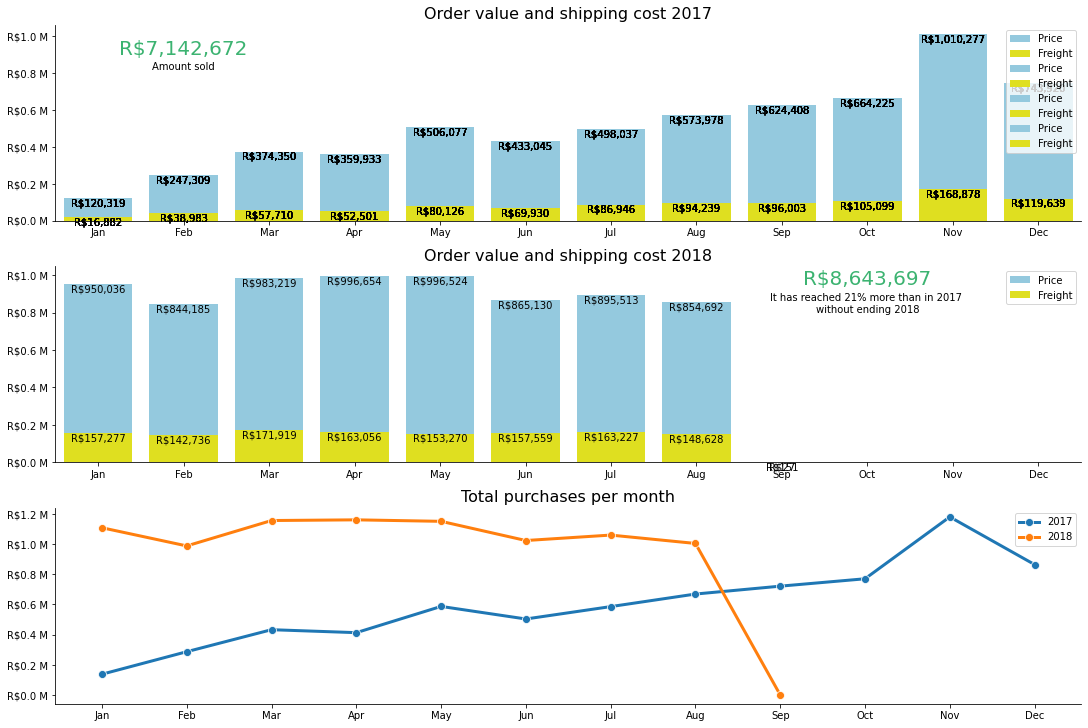

In [ ]:
#to display the chart item
fig

In [ ]:
#merge two dataset order payments & orders list to know the trend
#of the payment method of the customers
# order id is common for both joining the frame
payment_data = pd.merge(order_payments_data, orders_data, on="order_id")
payment_data["payment_type"] = payment_data["payment_type"].str.capitalize()
payment_data.head(2)


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,2018,4,Apr,201804,20180425,25,2,Wed,22,Night
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,2018,6,Jun,201806,20180626,26,1,Tue,11,Morning


In [ ]:
#Grouping for pie chart, what is the most used payment method?
pay1 = payment_data.groupby(by=["payment_type"]).agg({"order_id": "count","payment_value": "sum"}).reset_index().sort_values(by="order_id",ascending=False)
pay1.head(2)

,payment_type,order_id,payment_value
1,Credit_card,76537,1.249352e+07
0,Boleto,19721,2.859682e+06


In [ ]:
#Group for bar chart to count transactions by payment type.
pay2 = payment_data.groupby(by=["payment_type", "order_purchase_year"]).agg({"order_id": "count"}).reset_index().sort_values(by=["order_purchase_year","order_id"],ascending=False)
pay2.head(2)

,payment_type,order_purchase_year,order_id
3,Credit_card,2018,41969
1,Boleto,2018,10213


In [ ]:
#Group to know which are the trends of the payment methods
#pay.groupby(by=["order_purchase_year", "order_purchase_year_month","order_purchase_month_name"]).agg({"order_id": "count","price": "sum","freight_value": "sum","total": "sum"}).reset_index()
pay3 = payment_data.groupby(by=["order_purchase_year_month", "payment_type"]).agg({"order_id": "count"}).reset_index().sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
pay3.head(2)

,order_purchase_year_month,payment_type,order_id
1,201701,Credit_card,583
0,201701,Boleto,197


In [ ]:
#plotting the chart
fig = plt.figure(constrained_layout=True, figsize=(15, 10))


<Figure size 1080x720 with 0 Axes>

In [ ]:
# Axis definition
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
#ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1,:])

In [ ]:
#creating the color list array
colors_list_bar = ['yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

In [ ]:
#The explode() function is used to transform each element of a list-like to a row, 
#replicating the index values. Returns: Series- Exploded lists to rows; 
#index will be duplicated for these rows.
explode = (0.1, 0.1, 0.1, 0.1, 0.8)

In [ ]:
ax1.pie(
    pay1["order_id"], 
    explode=explode, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=40,
    pctdistance=0.8, 
    colors=colors_list_bar)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=pay1["payment_type"], loc='best')
ax1.set_title("Most used payment method", size=14, color='black')

Text(0.5, 1.0, 'Most used payment method')

In [ ]:
sns.barplot(
    x="order_id", 
    y="payment_type", 
    data=pay2,  
    ax=ax2, 
    hue="order_purchase_year", 
    palette="Set2")
ax2.legend(loc="best")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title("Numbers of transactions by payment type", size=14, color="black" )
for rect in ax2.patches:
    ax2.annotate('{:,.0f}'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='left', size=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)

In [ ]:
sns.lineplot(x='order_purchase_year_month', y='order_id', data=pay3, ax=ax4, hue='payment_type',legend=False,
             style='payment_type', size='payment_type', palette=colors_list_bar, marker='o',markersize=8)
ax4.legend(labels=pay3["payment_type"], loc='upper left',fontsize=12)

In [ ]:
ax4.set_title("Trend in the payment method", size=14, color="black")
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.setp(ax4.get_xticklabels(), rotation=45)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle("Payment method", size=18)

Text(0.5, 0.98, 'Payment method')

<Figure size 432x288 with 0 Axes>

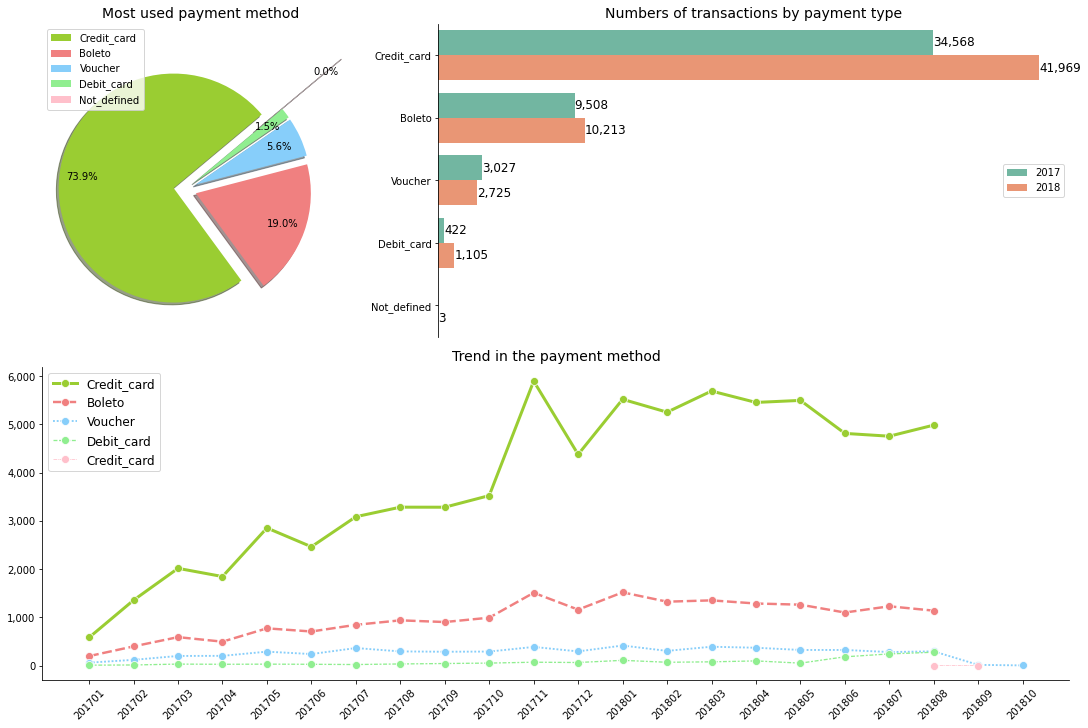

In [ ]:
fig

In [ ]:
#merge data frame elements (products, product category) to know the English name of the products
#Merging two datasets is the process of bringing two datasets together into one, 
#and aligning the rows from each based on common attributes or columns.
products = pd.merge(products_data, product_category_data, on="product_category_name")
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery


In [ ]:
#Assemble a new dataframe with only product_id and the English name of the product
products = products[["product_id", "product_category_name_english"]]
products.head(2)

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery


In [ ]:
#We put the product category in the items file
products = pd.merge(order_items_data, products, on="product_id")
products.head(2)
#products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff


In [ ]:
#We calculate the total that the customer paid for the product
products["total"] = products["price"] + products["freight_value"]
#new dataframe with the columns we just need
products = products[["order_id", "product_id", "price" , "freight_value", "total", "product_category_name_english"]]
products.head(2)

,order_id,product_id,price,freight_value,total,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,72.19,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,73.86,cool_stuff


In [ ]:
#We join our dataframe products with orders to obtain the information of the dates
products = pd.merge(products, orders_data, on="order_id")

In [ ]:
#new dataframe with the columns we just need
products = products[
    ["product_id", "price" , "freight_value", "total", "product_category_name_english","order_purchase_year","order_purchase_month_name","order_purchase_year_month"]
]
products["product_category_name_english"] = products["product_category_name_english"].str.capitalize()
products.head(2)

,product_id,price,freight_value,total,product_category_name_english,order_purchase_year,order_purchase_month_name,order_purchase_year_month
0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,72.19,Cool_stuff,2017,Sep,201709
1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,73.86,Cool_stuff,2017,Jun,201706


In [ ]:
#We group by category to generate the scatter plot
products_category = products.groupby("product_category_name_english").agg({"order_purchase_year_month" : "count","total" : "sum"}).reset_index()
products_category = products_category.sort_values(by="order_purchase_year_month", ascending=False).head(20)
products_category.head()

,product_category_name_english,order_purchase_year_month,total
7,Bed_bath_table,11107,1241075.14
43,Health_beauty,9619,1435611.23
65,Sports_leisure,8622,1152729.37
39,Furniture_decor,8265,895323.28
15,Computers_accessories,7806,1057532.31


In [ ]:
#We group by category to generate the bar plot
products_category_year = products.groupby(by=["product_category_name_english","order_purchase_year"]).agg({"order_purchase_year_month" : "count","total" : "sum"}).reset_index().sort_values(by=["order_purchase_year","order_purchase_year_month"], ascending=[True,False])
products_category_year.head()

,product_category_name_english,order_purchase_year,order_purchase_year_month,total
14,Bed_bath_table,2017,5223,590280.44
78,Furniture_decor,2017,4147,418857.15
129,Sports_leisure,2017,4095,530730.03
86,Health_beauty,2017,3668,550420.11
30,Computers_accessories,2017,3098,462761.27


In [ ]:
products_cat_trends = products.groupby(by=["product_category_name_english","order_purchase_year_month"]).agg({"order_purchase_year" : "count","total" : "sum"}).reset_index().sort_values(by=["order_purchase_year_month","order_purchase_year","product_category_name_english"], ascending=[True,False,True])
#We remove the data from 2016, we are only analyzing 2017 and 2018
products_cat_trends.drop(products_cat_trends.loc[products_cat_trends["order_purchase_year_month"]=="201609"].index, inplace=True)
products_cat_trends.drop(products_cat_trends.loc[products_cat_trends["order_purchase_year_month"]=="201610"].index, inplace=True)
products_cat_trends.drop(products_cat_trends.loc[products_cat_trends["order_purchase_year_month"]=="201612"].index, inplace=True)

In [ ]:
#We filter the categories that are in the Top 5 by category in 2017 y 2018
products_cat_trends = products_cat_trends[(products_cat_trends["product_category_name_english"]=="Bed_bath_table") | 
                                  (products_cat_trends["product_category_name_english"]=="Furniture_decor")|
                                  (products_cat_trends["product_category_name_english"]=="Sports_leisure")|
                                  (products_cat_trends["product_category_name_english"]=="Health_beauty")|
                                  (products_cat_trends["product_category_name_english"]=="Computers_accessories")]
products_cat_trends.head()

,product_category_name_english,order_purchase_year_month,order_purchase_year,total
654,Furniture_decor,201701,182,16461.75
725,Health_beauty,201701,85,14039.74
1101,Sports_leisure,201701,80,11447.27
122,Bed_bath_table,201701,48,4817.27
246,Computers_accessories,201701,31,4377.60


In [ ]:
#plotting the bar chart & graph 
fig = plt.figure(constrained_layout=True, figsize=(15, 15))

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Axis definition
gs = GridSpec(9, 2, figure=fig)
ax1 = fig.add_subplot(gs[:3,0:])
ax2 = fig.add_subplot(gs[3:5, 0])
ax3 = fig.add_subplot(gs[3:5, 1])
ax4 = fig.add_subplot(gs[5:,0:])

In [ ]:
for product in products_category["product_category_name_english"].unique():
    data = products_category[products_category["product_category_name_english"] == product]
    ax1.scatter(data['total'],data['order_purchase_year_month'],
                s=0.5*data['order_purchase_year_month']**1,
                alpha = 0.5,
                label=product)

In [ ]:
for index, row in products_category.iterrows():
    ax1.annotate(row['product_category_name_english'],
                 (row['total'], row['order_purchase_year_month']),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='left')

In [ ]:
ax1.set_xlabel("")
ax1.set_ylabel("Number of pieces")
ax1.set_title("The 20 best-selling categories",size=14)
ax1.set_ylim(0,14000)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('$R{x:,.0f}'))
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
sns.barplot(x="product_category_name_english", y="order_purchase_year_month", data=products_category_year.loc[products_category_year["order_purchase_year"]==2017].head(5), ax=ax2, palette="Blues_r")
ax2.set_xlabel("")
ax2.set_ylabel("Number of pieces")
ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_title("Top 5 best-selling categories 2017", size=14)
#ax2.set_ylim(0,6000)
plt.setp(ax2.get_xticklabels(), rotation=30)
for p in ax2.patches:
        ax2.annotate('{:,.0f}'.format(p.get_height()+5.9), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= 'black', size=12)
#ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2_twx = ax2.twinx()
sns.lineplot(x="product_category_name_english", y='total', data=products_category_year.loc[products_category_year["order_purchase_year"]==2017].head(5), ax=ax2_twx, linewidth=1.0, color="darkblue", marker="o", markersize=8)
#ax2_twx.set_ylim(0,990000)
ax2_twx.set_ylabel("Amount")
ax2_twx.spines['top'].set_visible(False)
ax2_twx.spines['left'].set_visible(False)
ax2_twx.yaxis.set_major_formatter(formatter_thousand_real_y)


In [ ]:
sns.barplot(x="product_category_name_english", y="order_purchase_year_month", data=products_category_year.loc[products_category_year["order_purchase_year"]==2018].head(5), ax=ax3, palette="Blues_r")
ax3.set_xlabel("")
ax3.set_ylabel("Number of pieces")
ax3.set_yticklabels([])
ax3.set_yticks([])
ax3.set_title("Top 5 best-selling categories 2018", size=14)
for p in ax3.patches:
        ax3.annotate('{:,.0f}'.format(p.get_height()+5.9), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= 'black', size=12)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
plt.setp(ax3.get_xticklabels(), rotation=30)
ax3_twx = ax3.twinx()
sns.lineplot(x="product_category_name_english", y='total', data=products_category_year.loc[products_category_year["order_purchase_year"]==2018].head(5), ax=ax3_twx, linewidth=1.0, color="darkblue", marker="o", markersize=8)
#ax3_twx.set_ylim(0,990000)
ax3_twx.set_ylabel("Amount")
ax3_twx.yaxis.set_major_formatter(formatter_thousand_real_y)
ax3_twx.spines['top'].set_visible(False)
ax3_twx.spines['top'].set_visible(False)
ax3_twx.spines['left'].set_visible(False)

In [ ]:
#Python iloc() function enables us to select a particular cell of the dataset, that is, 
#it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.
sns.lineplot(x='order_purchase_year_month', y='order_purchase_year', data=products_cat_trends, ax=ax4, hue='product_category_name_english',legend=False, style='product_category_name_english', size='product_category_name_english', marker='o', linewidth=3)
ax4.legend(labels=products_cat_trends["product_category_name_english"], loc='upper left', fontsize=12)
ax4.set_title("Top 5 trend 2017-2018", size=14)
ax4.set_ylabel("Number of pieces")
ax4.set_xlabel("")
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

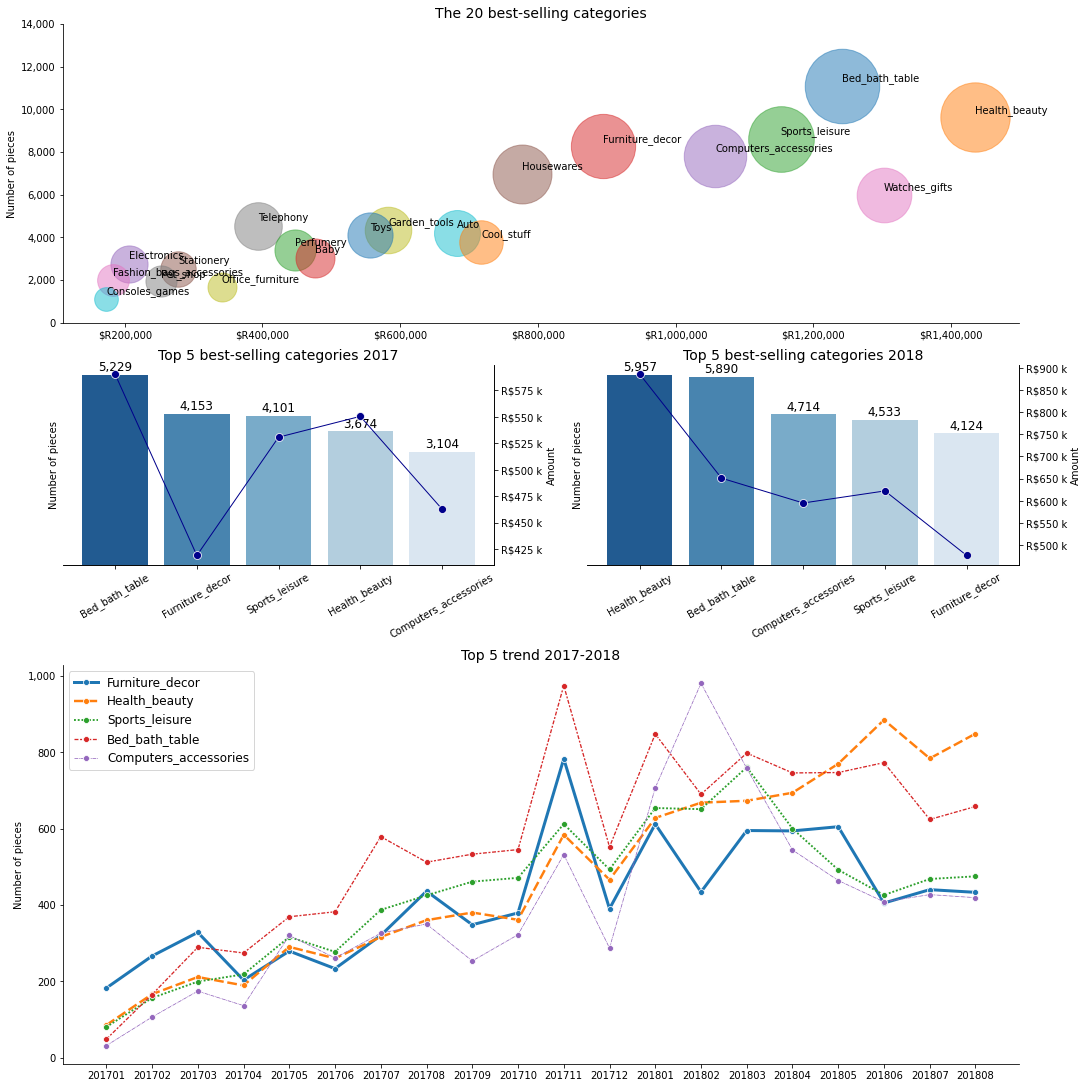

In [ ]:
fig

In [ ]:
#We group by product to generate the scatter plot
products_top = products.groupby(by=["product_id","product_category_name_english"]).agg({"order_purchase_month_name" : "count","total" : "sum"}).reset_index()
products_top =products_top.sort_values(by="order_purchase_month_name", ascending=False).head(10)
products_top.head(2)

,product_id,product_category_name_english,order_purchase_month_name,total
21612,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_decor,527,44820.76
19295,99a4788cb24856965c36a24e339b6058,Bed_bath_table,488,51071.60


In [ ]:
#We group by product to generate the bar plot
products_top_year = products.groupby(by=["product_id","order_purchase_year"]).agg({"order_purchase_year_month" : "count","total" : "sum"}).reset_index().sort_values(by=["order_purchase_year","order_purchase_year_month"], ascending=[True,False])
#We remove the data from 2016, we are only analyzing 2017 and 2018
products_top_year.drop(products_top_year.loc[products_top_year["order_purchase_year"]==2016].index, inplace=True)
products_top_year.head(2)

,product_id,order_purchase_year,order_purchase_year_month,total
22220,99a4788cb24856965c36a24e339b6058,2017,359,37819.85
9674,422879e10f46682990de24d770e7f83d,2017,276,20412.97


In [ ]:
#configuration chart pbjects
fig = plt.figure(constrained_layout=True, figsize=(15, 10))


<Figure size 1080x720 with 0 Axes>

In [ ]:
# Axis setings definition
gs = GridSpec(4, 2, figure=fig)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[:2, 1])
ax3 = fig.add_subplot(gs[2:,0])
ax4 = fig.add_subplot(gs[2:,1])

In [ ]:
sns.barplot(x="order_purchase_month_name", y="product_id",  data=products_top, ax=ax1, palette="rocket")
ax1.set_xlabel("")
ax1.set_ylabel("Product ID")
ax1.set_title("Numbers of pieces sold",size=14)
for rect in ax1.patches:
    ax1.annotate('{:,.0f}'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='right', size=12, color="white")    
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)

In [ ]:
#Annotate the point xy with text text. In the simplest form, the text is placed at xy. 
#Optionally, the text can be displayed in another position xytext.
sns.barplot(x="total", y="product_id",  data=products_top, ax=ax2, palette="rocket")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title("Amount sold", size=14)
for rect in ax2.patches:
    ax2.annotate('R${:,.0f}'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='right', size=12, color="white")    
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

In [ ]:
sns.barplot(x="product_id", y="order_purchase_year_month", data=products_top_year.loc[products_top_year["order_purchase_year"]==2017].head(10), ax=ax3, palette="Purples_r")
ax3.set_xlabel("Product ID")
ax3.set_ylabel("Number Of Pieces Sold")
plt.setp(ax3.get_xticklabels(), rotation=90)
ax3.set_title("Most seller in 2017", size=14)
ax3.set_yticklabels([])
ax3.set_yticks([])

[]

In [ ]:
#patches. Rectangle class is used to rectangle patch to a plot with lower 
#left at xy = (x, y) with specified width, height and rotation angle.
for p in ax3.patches:
        ax3.annotate('{:,.0f}'.format(p.get_height()+5.9), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= 'black', size=12)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3_twx = ax3.twinx()
sns.lineplot(x="product_id", y='total', data=products_top_year.loc[products_top_year["order_purchase_year"]==2017].head(10), ax=ax3_twx, linewidth=1.0, color="darkblue", marker="o", markersize=8)
ax3_twx.set_ylabel("Amount Sold")
ax3_twx.spines['top'].set_visible(False)
ax3_twx.spines['left'].set_visible(False)
ax3_twx.yaxis.set_major_formatter(formatter_thousand_real_y)


In [ ]:
#patches. Rectangle class is used to rectangle patch to a plot with lower 
#left at xy = (x, y) with specified width, height and rotation angle.
for p in ax4.patches:
        ax4.annotate('{:,.0f}'.format(p.get_height()+5.9), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= 'black', size=12)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4_twx = ax4.twinx()
sns.lineplot(x="product_id", y='total', data=products_top_year.loc[products_top_year["order_purchase_year"]==2018].head(10), ax=ax4_twx, linewidth=1.0, color="darkblue", marker="o", markersize=8)
ax4_twx.set_ylabel("Amount Sold")
ax4_twx.spines['top'].set_visible(False)
ax4_twx.spines['left'].set_visible(False)
ax4_twx.yaxis.set_major_formatter(formatter_thousand_real_y)


In [ ]:
plt.suptitle("Number of Pieces and Amount Sold \nby Products", size=16)

Text(0.5, 0.98, 'Number of Pieces and Amount Sold \nby Products')

<Figure size 432x288 with 0 Axes>

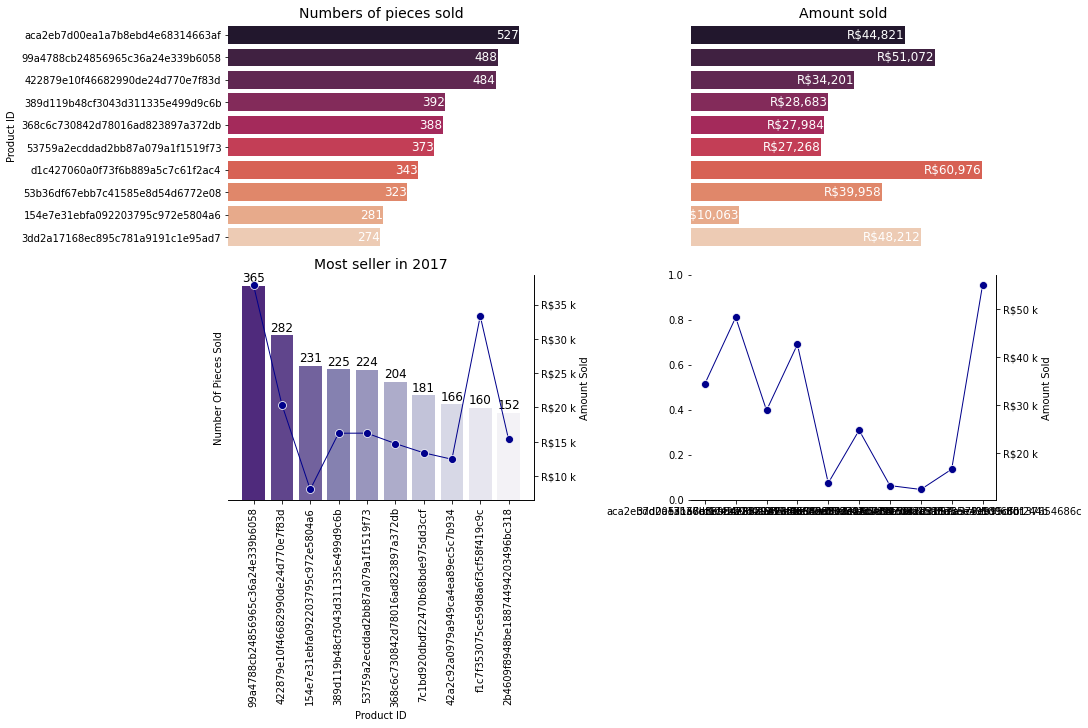

In [ ]:
#to display the chart
fig

In [ ]:
#To find out the order status
order_status = orders_data.groupby("order_status").size().reset_index().sort_values(by=0,ascending=False)
order_status["order_status"] = order_status["order_status"].str.capitalize()
order_status

,order_status,0
3,Delivered,96211
6,Shipped,1098
7,Unavailable,602
1,Canceled,599
5,Processing,299
4,Invoiced,296
2,Created,5
0,Approved,2


In [ ]:
#to config the graph configuration
fig = make_subplots(rows=1, cols=1, 
                    specs=[[{"type": "pie"}]],
                    vertical_spacing=0, horizontal_spacing=0.02,
                    subplot_titles=(""))

In [ ]:
#New traces can be added to a graph object 
#figure using the add_trace() method. This method accepts a graph object trace
fig.add_trace(go.Pie(values= order_status[0], labels=order_status["order_status"], name='Store type',
                     marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole=0.7,
                    hoverinfo='label+value', textinfo='label + value'), 
                    row=1, col=1)
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_layout(height=400, bargap=0.4,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Orders Status (2016-2018)",
                  template="plotly_white",
                  title_font=dict(size=22, color='black', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.update_traces(rotation=90)
fig.update_traces(textposition="auto", selector=dict(type='pie'))
fig

In [ ]:
#We group the orders to know the seller
freight_value = order_items_data.groupby(by=["order_id", "seller_id"]).agg({"price" : "count","freight_value" : "sum"}).reset_index().sort_values(by="price", ascending=False)
#freight_value
# We group the freight value and the sales to know the dates made to the freight
freight_value = pd.merge(freight_value, sales, on = "order_id")
#freight_value
# We group the freight value and the sellers to know the city and state of the seller
freight_value = pd.merge(freight_value, sellers_data, on = "seller_id")
#freight_value
# We select the columns necessary for the analysis
freight_value = freight_value[["seller_id", "order_purchase_year", "order_purchase_year_month","order_purchase_timestamp", "order_delivered_carrier_date" , "order_delivered_customer_date", "order_estimated_delivery_date", "freight_value_x", "seller_city", "seller_state"]]
freight_value.head()

,seller_id,order_purchase_year,order_purchase_year_month,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,freight_value_x,seller_city,seller_state
0,2709af9587499e95e803a6498a5a56e9,2017,201707,2017-07-16 18:19:25,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,164.37,Sao paulo,SP
1,2709af9587499e95e803a6498a5a56e9,2018,201807,2018-07-25 09:57:52,2018-07-25 11:19:00,2018-08-02 11:28:39,2018-08-15,44.48,Sao paulo,SP
2,2709af9587499e95e803a6498a5a56e9,2017,201706,2017-06-13 22:33:24,2017-06-16 15:21:51,2017-07-03 15:45:56,2017-07-18,43.10,Sao paulo,SP
3,2709af9587499e95e803a6498a5a56e9,2017,201704,2017-04-22 11:35:35,2017-04-25 13:45:05,NaN,2017-05-23,29.73,Sao paulo,SP
4,2709af9587499e95e803a6498a5a56e9,2017,201709,2017-09-01 10:26:06,2017-09-01 19:12:29,2017-09-08 19:07:34,2017-09-21,11.85,Sao paulo,SP


In [ ]:
# We check if there are rows that do not contain data
freight_value.isnull().sum()

seller_id                           0
order_purchase_year                 0
order_purchase_year_month           0
order_purchase_timestamp            0
order_delivered_carrier_date      977
order_delivered_customer_date    2152
order_estimated_delivery_date       0
freight_value_x                     0
seller_city                         0
seller_state                        0
dtype: int64

In [ ]:
# We eliminate the rows that do not contain data in the columns "order delivered carrier date" and "order delivered customer date"
#Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values.
freight_value = freight_value.dropna(subset=["order_delivered_customer_date","order_delivered_carrier_date"])
#freight_value.head()

In [ ]:
#Convert column order_delivered_customer_date (object) to datetime
freight_value["order_delivered_customer_date"] = freight_value["order_delivered_customer_date"].apply(pd.to_datetime)

In [ ]:
# Formatting dates to calculate delivery time
#Pandas to_datetime() method helps to convert string Date time into Python Date time object
freight_value["order_purchase_timestamp"] = pd.to_datetime(freight_value["order_purchase_timestamp"].dt.strftime("%Y-%m-%d"))
freight_value["order_delivered_carrier_date"] = pd.to_datetime(freight_value["order_delivered_carrier_date"].dt.strftime("%Y-%m-%d"))
freight_value["order_delivered_customer_date"] = pd.to_datetime(freight_value["order_delivered_customer_date"].dt.strftime("%Y-%m-%d"))

In [ ]:
# We take the difference of days between the columns
freight_value["time_delivery_customer"] = freight_value["order_delivered_customer_date"] - freight_value["order_purchase_timestamp"]
freight_value["time_delivery_estimated"] = freight_value["order_delivered_customer_date"] - freight_value["order_estimated_delivery_date"]
freight_value["time_purchase_estimated_day_time"] = freight_value["order_estimated_delivery_date"] - freight_value["order_purchase_timestamp"]

In [ ]:
#freight_value
# We convert the two columns into str
#Python astype() method enables us to set or convert the data type of an existing data column in a dataset or 
#a data frame. By this, we can change or transform the type of the data values or single or multiple columns to altogether another form using astype() function.
freight_value["time_delivery_customer"] = freight_value["time_delivery_customer"].astype(str)
freight_value["time_delivery_estimated"] = freight_value["time_delivery_estimated"].astype(str)
freight_value["time_purchase_estimated_day_time"] = freight_value["time_purchase_estimated_day_time"].astype(str)

In [ ]:
separator_c = freight_value["time_delivery_customer"].str.rsplit(" ", n=1, expand=True)
separator_c.columns = ["customer_day_time", "1"]
separator_c = separator_c.drop(columns = ["1"])
freight_value = pd.concat([freight_value, separator_c], axis=1)

In [ ]:
separator_d = freight_value["time_delivery_estimated"].str.rsplit(" ", n=1, expand=True)
separator_d.columns = ["delivery_day_time", "2"]
separator_d = separator_d.drop(columns = ["2"])
freight_value = pd.concat([freight_value, separator_d], axis=1)

In [ ]:
separator_pe = freight_value["time_purchase_estimated_day_time"].str.rsplit(" ", n=1, expand=True)
separator_pe.columns = ["purchase_estimated_day_time", "2"]
separator_pe = separator_pe.drop(columns = ["2"])
freight_value = pd.concat([freight_value, separator_pe], axis=1)

In [ ]:
freight_value["customer_day_time"] = freight_value["customer_day_time"].astype(int)
freight_value["delivery_day_time"] = freight_value["delivery_day_time"].astype(int)
freight_value["purchase_estimated_day_time"] = freight_value["purchase_estimated_day_time"].astype(int)

In [ ]:
## Rangos para asignar
conditionlist = [
    (freight_value["delivery_day_time"] <=0),(freight_value["delivery_day_time"] > 0)]

## Nombre de los rangos de acuerdo a la entrega
choicelist = ["On Time", "Out of Time"]
freight_value['delivery_status'] = np.select(conditionlist, choicelist, default='Not Specified')

In [ ]:
#match the seller Id & get the status value
delivery_status = freight_value.groupby("delivery_status").count()["seller_id"].reset_index()
delivery_status

,delivery_status,seller_id
0,On Time,90997
1,Out of Time,6544


In [ ]:
#create the delivery status year using group by Order purchase year & delivery status
delivery_status_year = freight_value.groupby(by=["order_purchase_year","delivery_status"]).count()["seller_id"].reset_index()
delivery_status_year

,order_purchase_year,delivery_status,seller_id
0,2017,On Time,41465
1,2017,Out of Time,2459
2,2018,On Time,49532
3,2018,Out of Time,4085


In [ ]:
#The 2 states that take the most time compared to the estimated date
delivery_low = freight_value[(freight_value["delivery_day_time"]>=1)]
delivery_low = delivery_low.groupby("seller_state").mean()["delivery_day_time"].reset_index().sort_values(by="delivery_day_time",ascending=False).head(10)
delivery_low.head(2)

,seller_state,delivery_day_time
0,AM,38.0
2,CE,26.5


In [ ]:
#The 2 states that take less time to deliver compared to the estimated date
delivery_fast = freight_value[(freight_value["delivery_day_time"]<=0)]
delivery_fast = delivery_fast.groupby("seller_state").mean()["delivery_day_time"].reset_index().sort_values(by="delivery_day_time",ascending=True).head(10)
delivery_fast.head(2)

,seller_state,delivery_day_time
17,RO,-24.500000
11,PB,-19.794118


In [ ]:
delivery_data = freight_value.groupby("seller_state").agg({"freight_value_x":"mean", "customer_day_time":"mean", "purchase_estimated_day_time": "mean"}).reset_index()
delivery_data = delivery_data.sort_values(by="freight_value_x", ascending=False)
delivery_data.head()

,seller_state,freight_value_x,customer_day_time,purchase_estimated_day_time
17,RO,50.912857,17.428571,41.928571
2,CE,48.347241,17.655172,31.022989
11,PB,41.398000,12.571429,31.742857
4,ES,38.477573,13.003236,26.032362
13,PI,37.140909,13.727273,28.727273


In [ ]:
#create matplotlib chart & set the configuration value
fig = plt.figure(constrained_layout=True, figsize=(15, 20))

<Figure size 1080x1440 with 0 Axes>

In [ ]:
# Axis definition
gs = GridSpec(6, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, :])

In [ ]:
colors_list = ['lightskyblue', 'lightgreen']
explode = (0.0, 0.2)

In [ ]:
ax1.pie(delivery_status["seller_id"], autopct='%1.1f%%',shadow=True, startangle=40,pctdistance=0.8, explode=explode, colors=colors_list)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=delivery_status["delivery_status"], loc='upper left')
ax1.set_title("Delivery Status", size=14, color='black')

Text(0.5, 1.0, 'Delivery Status')

In [ ]:
sns.barplot(x="order_purchase_year", y="seller_id", data=delivery_status_year, ax=ax2, hue="delivery_status", palette="mako")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.legend(loc="best")
ax2.set_title("Delivery Status \nPer Year", size=14, color="black")
for p in ax2.patches:
        ax2.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= 'black')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_yticklabels([])
ax2.set_yticks([])

[]

In [ ]:
sns.histplot(data=freight_value, x=freight_value["delivery_day_time"], kde=True, ax=ax3, color=colors_list, hue=freight_value["delivery_status"])
ax3.set_xlim(-40,20)
ax3.set_xlabel("Days")
ax3.set_ylabel("")
ax3.set_title("Difference between the estimated delivery date and the actual delivery date", size=14, color="black")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
sns.barplot(x="delivery_day_time", y="seller_state",  data=delivery_low, ax=ax4, color="darkblue")
ax4.set_xlabel("Days")
ax4.set_ylabel("")
ax4.set_title("The 10 states that take longer to deliver compared to the estimated date",size=14, color="black")
for rect in ax4.patches:
    ax4.annotate('{:,.0f} days'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='right', size=12, color="white")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.axes.get_xaxis().set_visible(False)

In [ ]:
sns.barplot(x="delivery_day_time", y="seller_state",  data=delivery_fast, ax=ax5, color="darkblue")
ax5.set_xlabel("Days")
ax5.set_ylabel("")
ax5.set_title("The 10 states that take less time to deliver compared to the estimated date",size=14, color="black")
for rect in ax5.patches:
    ax5.annotate('{:,.0f} days'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(-1, 0),textcoords='offset points', va='center', ha='left', size=12, color="white")
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.axes.get_xaxis().set_visible(False)

In [ ]:
sns.barplot(x="seller_state", y="freight_value_x", data=delivery_data, ax=ax6, color="dodgerblue")
#ax6.legend(loc="best")
ax6.set_xlabel("States")
ax6.set_ylabel("Average freight cost")
ax6.set_title("Average Delivery Cost and Shipping", size=14, color="black", loc='left')
for p in ax6.patches:
        ax6.annotate('R${:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= 'black', size=12)
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.set_yticklabels([])
ax6.set_yticks([])
ax6_twx = ax6.twinx()
sns.lineplot(x="seller_state", y='customer_day_time', data=delivery_data, ax=ax6_twx, linewidth=1.0, color="darkblue", marker="o", markersize=7)
sns.lineplot(x="seller_state", y='purchase_estimated_day_time', data=delivery_data, ax=ax6_twx, linewidth=1.0, color="darkgreen", marker="o", markersize=8)
ax6_twx.set_ylabel("Days")
ax6_twx.spines['top'].set_visible(False)
ax6_twx.spines['left'].set_visible(False)

In [ ]:
ax6_twx.annotate(f'Average Estimated Delivery Time', ("AM", 48), xytext=(75, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='darkblue', ha='center')

ax6_twx.annotate(f'Average Delivery Time', ("AM", 39), xytext=(100, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='darkgreen', ha='center')

Text(100, 25, 'Average Delivery Time')

In [ ]:
plt.suptitle("Freight times and costs", size=18)


Text(0.5, 0.98, 'Freight times and costs')

<Figure size 432x288 with 0 Axes>

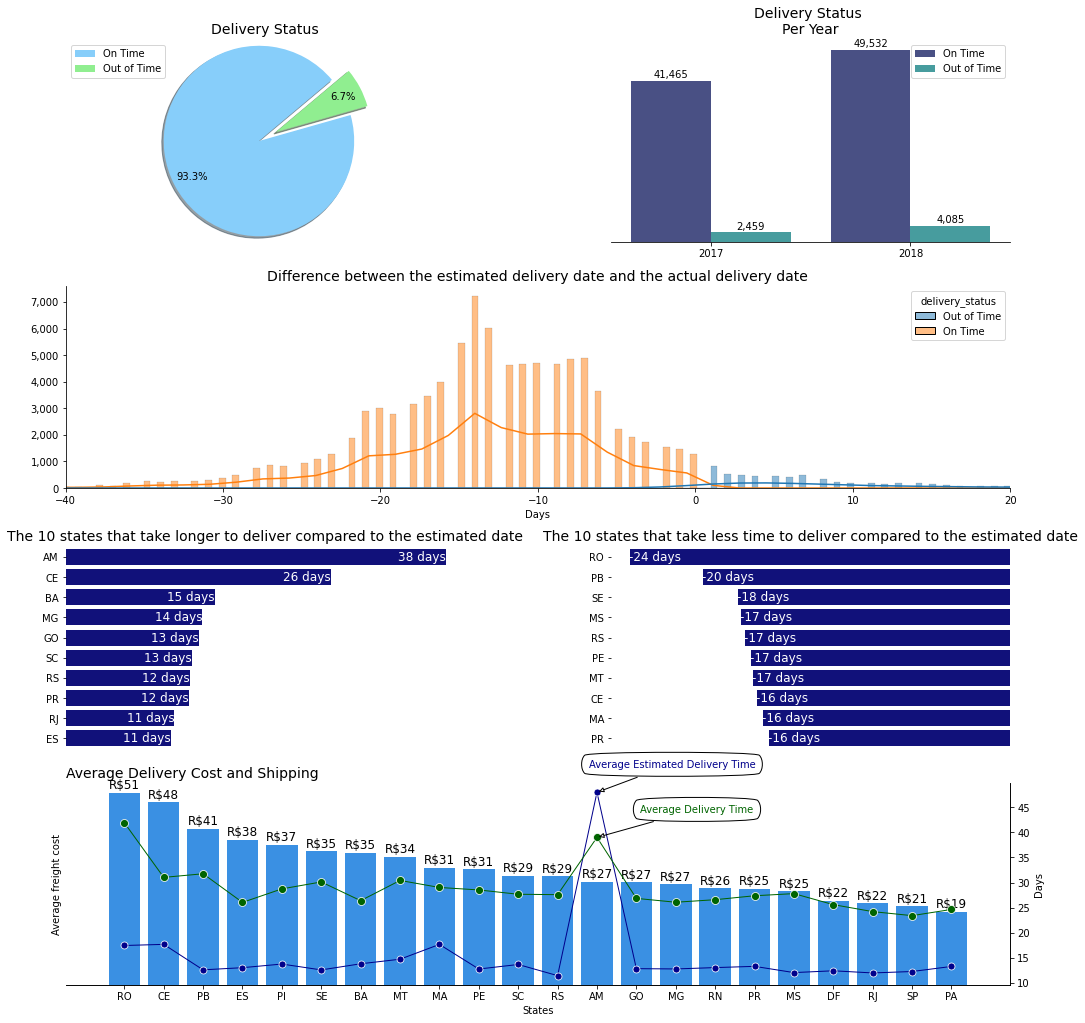

In [ ]:
#display chart through fig
fig